In [1]:
import numpy as np
from sklearn import datasets, cross_validation, neighbors, metrics, model_selection
from sklearn import cross_validation as cv
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.colors as clr

%pylab inline

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


### 1. Метод k ближайших соседей

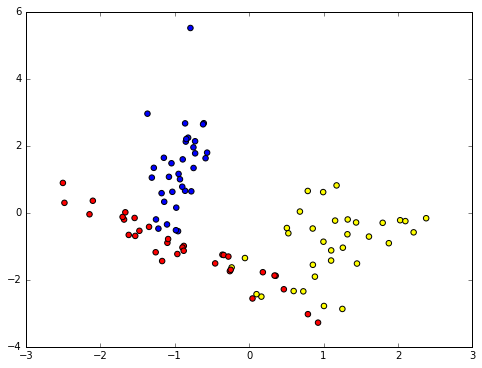

In [2]:
X, y = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                    n_classes = 3, n_redundant=0, n_clusters_per_class=1)

colors = clr.ListedColormap(['blue', 'red', 'yellow'])
light_colors = clr.ListedColormap(['lightblue', 'pink', 'lightyellow'])

plt.figure(figsize=(8,6))
plt.scatter(map(lambda x: x[0], X), map(lambda x: x[1], X), c=y, cmap=colors, s=30)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.3, random_state = 1)

In [4]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [5]:
def plot_decision_surface(est, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    est.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(est.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 30, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, est.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 30, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, est.predict(test_data))))

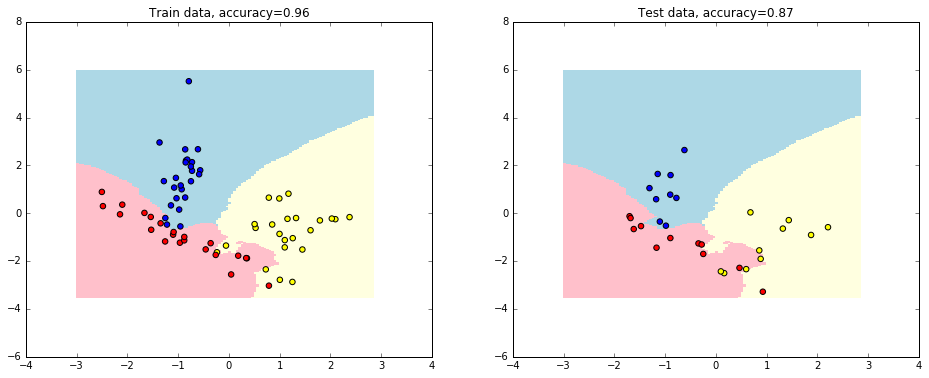

In [6]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
plot_decision_surface(knn, X_train, y_train, X_test, y_test)

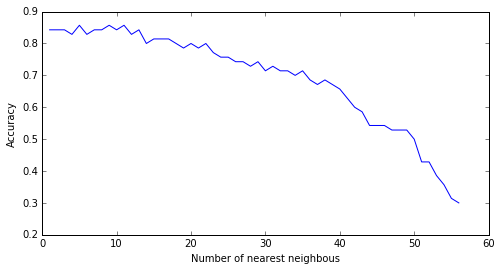

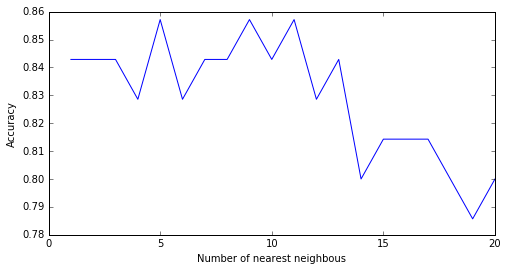

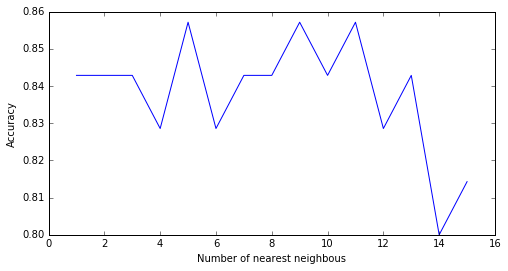

In [7]:
grid_searcher = GridSearchCV(neighbors.KNeighborsClassifier(), {'n_neighbors': range(1, 57)}, cv=cv.KFold(70, 5), n_jobs=4)
grid_searcher.fit(X_train, y_train)
means = np.array([iteration.mean_validation_score for iteration in grid_searcher.grid_scores_])

plt.figure(figsize=(8, 4))
plt.plot(range(1, 57), means)
plt.xlabel('Number of nearest neighbous')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(1, 21), means[:20])
plt.xlabel('Number of nearest neighbous')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(1, 16), means[:15])
plt.xlabel('Number of nearest neighbous')
plt.ylabel('Accuracy')
plt.show()

Вывод: оптимальное количество соседей = 5

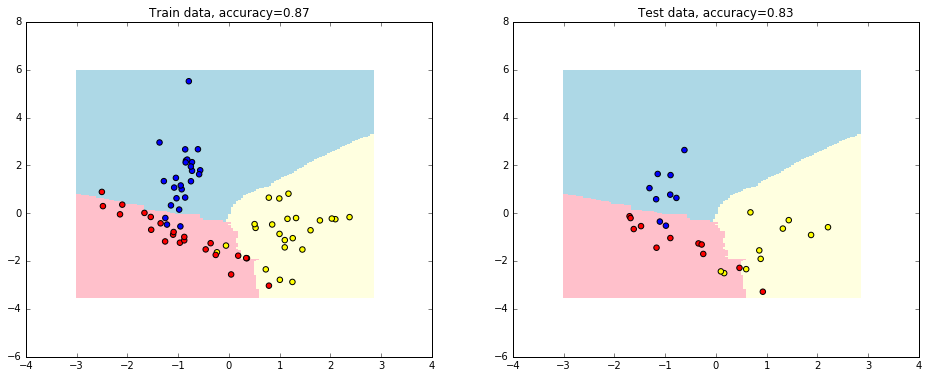

In [8]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
plot_decision_surface(knn, X_train, y_train, X_test, y_test)

### 2. Наивный байесовский классификатор

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
target : 0


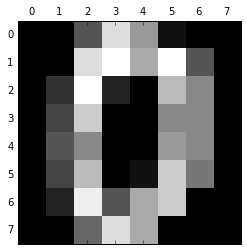

(1797, 64)


In [9]:
digits = datasets.load_digits()

print digits.data[0]

print 'target :', digits.target[0]


plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

print digits.data.shape 

In [10]:
breast_cancer = datasets.load_breast_cancer()

print breast_cancer.data[0]

print 'target :', breast_cancer.target[0], ', name :', breast_cancer.target_names[0]

print breast_cancer.data.shape

[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]
target : 0 , name : malignant
(569, 30)


In [11]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

for model in [BernoulliNB(), MultinomialNB(), GaussianNB()]:
    print 'classifier ', model
    for (data, name) in [(digits, 'digits'), (breast_cancer, 'breast_cancer')]:
        print '\t', name, model_selection.cross_val_score(model, data.data, data.target).mean()

classifier  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
	digits 0.825823650778
	breast_cancer 0.627420402859
classifier  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
	digits 0.870877148974
	breast_cancer 0.894579040193
classifier  GaussianNB(priors=None)
	digits 0.818600380355
	breast_cancer 0.936749280609


1) <b/>Каким получилось максимальное качество классификации на датасете breast_cancer?</b>

0.94 на GaussianNB

2) <b/>Каким получилось максимальное качество классификации на датасете digits?</b>

0.87 на MultinomialNB

3) <b/>Какие утверждения из приведенных ниже верны? </b>

(a) (неверно) На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли

(b) (неверно) На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением

(c) (верно) Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков 

(d) (верно) На вещественных признаках лучше всего сработало нормальное распределение

### 3. Метрики в задаче регрессии

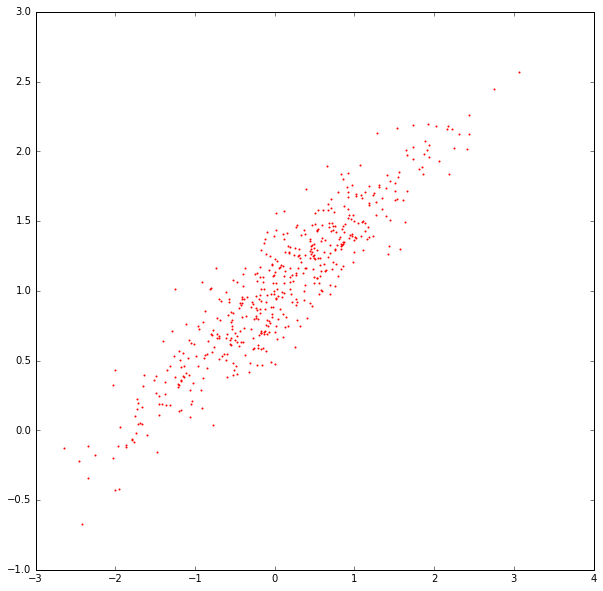

In [12]:
import scipy.stats as sps

x = sps.norm.rvs(size=500)
y = 0.5*x + 1 + sps.norm(loc=0, scale=0.2).rvs(size=500)

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size = 0.3, random_state = 1)

plt.figure(figsize=(10,10))
plt.scatter(x,y,s=1,color='red')
plt.show()

k = 0.511722719595 b = 0.993396672355


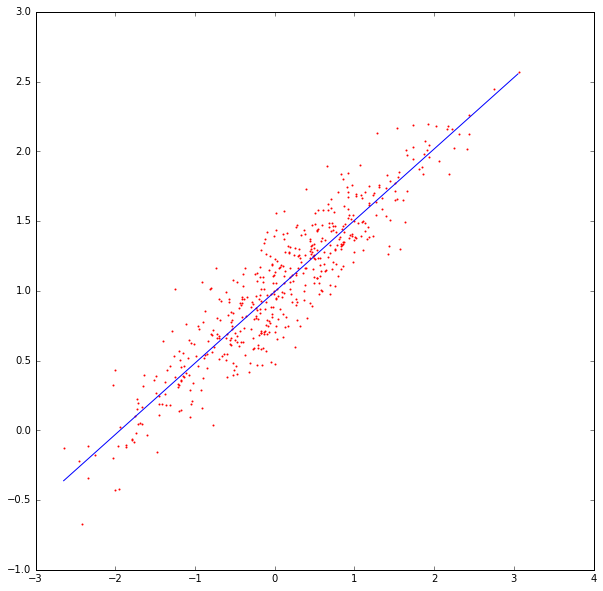

In [13]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error as mse

def f(k,b,x): 
    return k*x + b

k, b = minimize(lambda c: mse(y_train, f(c[0], c[1], x_train)), [0,0]).x
print 'k =', k, 'b =',b

plt.figure(figsize=(10,10))
plt.scatter(x,y,s=1,color='red')
plt.plot(np.arange(min(x),max(x), 0.1), k*np.arange(min(x),max(x), 0.1) + b)
plt.show()

575


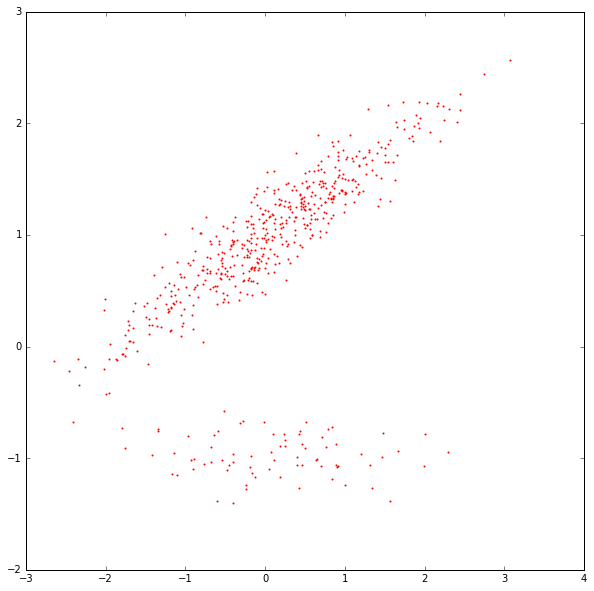

In [14]:
x = np.append(x, sps.norm.rvs(size=75))
y = np.append(y, -1 + sps.norm(loc=0, scale=0.2).rvs(size=75))

print len(y)

plt.figure(figsize=(10,10))
plt.scatter(x,y,s=1,color='red')
plt.show()

mse: k = 0.437757152377 b = 0.742482027595
mae: k = 0.507867672841 b = 0.954223037182


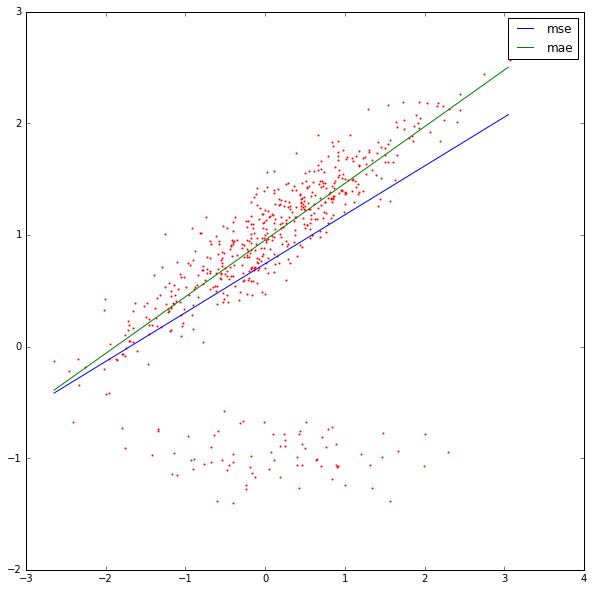

In [15]:
from sklearn.metrics import mean_absolute_error as mae

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size = 0.3, random_state = 1)

k_mse, b_mse = minimize(lambda c: mse(y_train, f(c[0], c[1], x_train)), [0,0]).x
print 'mse: k =', k_mse, 'b =',b_mse

k_mae, b_mae = minimize(lambda c: mae(y_train, f(c[0], c[1], x_train)), [0,0]).x
print 'mae: k =', k_mae, 'b =',b_mae

plt.figure(figsize=(10,10))
plt.scatter(x,y,s=1,color='red')
plt.plot(np.arange(min(x),max(x), 0.1), k_mse*np.arange(min(x),max(x), 0.1) + b_mse, label='mse')
plt.plot(np.arange(min(x),max(x), 0.1), k_mae*np.arange(min(x),max(x), 0.1) + b_mae, label='mae')
plt.legend()
plt.show()

Вывод: Модели, оптимизирующие MAE, устойчивы к выбросам, в отличие от моделей, оптимизирующих MSE.

### 4. Теоретические задачи

#### 4.1 Наивный байес и центроидный классификатор

Правило в наивнм байесовском классификаторе: $a(x) = \underset{y}{\arg\max} (P(y) \cdot \prod_{k = 1}^{n}P(x^{(k)} | y))$. 

Рассмотрим классификатор из условия.

Так как априорная вероятность одинакова, то ее можно убрать из argmax.

$$a(x) = \underset{y}{\arg\max} \prod_{k = 1}^{n}P(x^{(k)} | y) = \underset{y}{\arg\max} \prod_{k = 1}^{n}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x^{(k)} - \mu_{yk})^{2}}{2\sigma^2}} =$$ 
$$ = \underset{y}{\arg\max}\frac{1}{(2\pi\sigma^{2}) ^ {\frac{n}{2}}}e^{-\frac{1}{2\sigma^2}\sum_{k = 1}^{n}(x^{(k)} - \mu_{yk})^{2}} = \underset{y}{\arg\min}\sum_{k = 1}^{n}(x^{(k)} - \mu_{yk})^{2}$$

$\sum_{k = 1}^{n}(x^{(k)} - \mu_{yk})^{2}$ - расстояние от точки до центра класса. 

То есть этот классификатор относит точку к классу, центр которого ближе всего. 